In [9]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split

In [1]:
df = pd.read_csv('SRP158491_converted.tsv', sep='\t')

df

,Gene,SRR7725764,SRR7725765,SRR7725767,SRR7725768,SRR7725770,SRR7725772,SRR7725773,SRR7725774,SRR7725775,...,SRR7726082,SRR7726083,SRR7726089,SRR7726092,SRR7726094,SRR7726095,SRR7726096,SRR7726097,SRR7726098,SRR7726099
0,TSPAN6,3.136188,5.375076,0.291745,0.258578,6.014666,4.883872,21.460480,3.386398,0.000000,...,13.731706,1.645844,3.188051,17.539990,2.125112,14.213586,8.422800,0.000000,1.620008,14.032206
1,TNMD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.768578,0.000000
2,DPM1,68.181700,131.896120,34.899677,562.589700,140.499310,323.004700,464.930180,416.068080,337.545700,...,387.810150,421.635700,323.789670,301.299040,402.624940,422.879670,442.268550,404.414150,556.072940,139.260510
3,SCYL3,77.735520,42.363340,48.085857,110.548100,52.349422,120.034096,145.889850,128.955440,90.929340,...,169.642030,114.807370,85.415245,87.620575,117.897720,160.923280,131.868960,103.098690,96.676780,49.404740
4,FIRRM,18.562527,23.658604,15.999660,32.007370,18.406652,38.122380,38.921190,32.574413,43.490807,...,53.578606,53.470234,64.275110,28.295240,56.696815,46.024033,29.202042,38.100930,36.457996,16.427351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43358,NaN,0.000000,0.000000,0.000000,0.980034,0.000000,0.000000,0.000000,1.064364,3.188875,...,1.085548,0.000000,0.000000,3.072836,0.000000,0.000000,1.114735,0.000000,0.000000,0.000000
43359,NaN,0.000000,1.122783,0.000000,12.337006,0.000000,9.605180,0.000000,20.274616,7.724580,...,0.000000,7.163047,0.000000,4.011960,9.727552,7.450402,0.000000,5.967461,0.000000,0.000000
43360,NaN,0.000000,0.000000,0.000000,0.000000,1.088816,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.082430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
43361,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [6]:
df['variance'] = df.var(axis=1)
top_5000_genes = df.nlargest(5000, 'variance')

In [7]:
top_5000_genes = top_5000_genes.drop(columns=['variance'])

top_5000_genes.to_csv('top_5000_genes.csv', sep='\t', index=False)

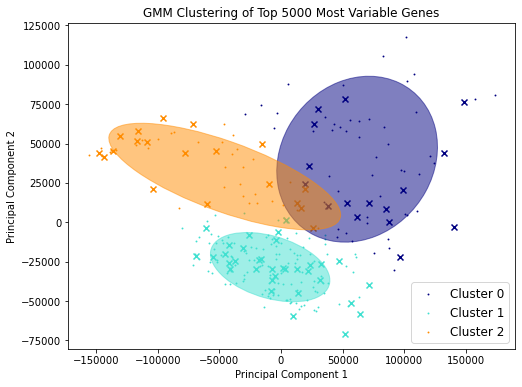

In [61]:
# Emily Clustering Algorithm - Gaussian Mixture

# Transpose the dataframe to have samples as rows and genes as columns
X = top_5000_genes.set_index('Gene').T

# Split the data into training and testing sets
X_train, X_test = train_test_split(X, test_size=0.25, random_state=0)

# Define the number of clusters (you can adjust this based on your data)
n_clusters = 3

# Initialize and fit the GMM
gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', max_iter=100, random_state=0)
gmm.fit(X_train)

# Predict the cluster labels
y_train_pred = gmm.predict(X_train)
y_test_pred = gmm.predict(X_test)

# Function to plot ellipses
def make_ellipses(gmm, ax):
    for n, color in enumerate(colors):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(2) * gmm.covariances_[n]
        
        # Eigen decomposition of the covariance matrix
        v, w = np.linalg.eigh(covariances)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)  # Scaling factor for the ellipse axes
        
        # Calculate the angle of the ellipse
        u = w[0] / np.linalg.norm(w[0])  # Unit vector of eigenvector
        angle = np.arctan2(u[1], u[0])  # Angle in radians
        angle = 180 * angle / np.pi  # Convert to degrees
        
        # Draw the ellipse
        ell = mpl.patches.Ellipse(
            gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color
        )
        ell.set_clip_box(ax.bbox)
        ell.set_alpha(0.5)
        ax.add_artist(ell)
        ax.set_aspect("equal", "datalim")


# Plotting
colors = ["navy", "turquoise", "darkorange"]
plt.figure(figsize=(8, 6))

# Plot the training data
for n, color in enumerate(colors):
    data = X_train[y_train_pred == n]
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], s=0.8, color=color, label=f'Cluster {n}')

# Plot the test data with crosses
for n, color in enumerate(colors):
    data = X_test[y_test_pred == n]
    plt.scatter(data.iloc[:, 0], data.iloc[:, 1], marker="x", color=color)

# Add ellipses
ax = plt.gca()
make_ellipses(gmm, ax)

plt.title('GMM Clustering of Top 5000 Most Variable Genes')
plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))
plt.show()

In [70]:
def make_varaible_ellipses(gmm, ax, n_clusters):
    # Create ellipses based on covariance matrices
    for n, color in enumerate(colors[:n_clusters]):
        if gmm.covariance_type == "full":
            covariances = gmm.covariances_[n][:2, :2]
        elif gmm.covariance_type == "tied":
            covariances = gmm.covariances_[:2, :2]
        elif gmm.covariance_type == "diag":
            covariances = np.diag(gmm.covariances_[n][:2])
        elif gmm.covariance_type == "spherical":
            covariances = np.eye(gmm.means_.shape[1]) * gmm.covariances_[n]
        
        v, w = np.linalg.eigh(covariances)
        angle = np.arctan2(w[0][1], w[0][0])
        angle = np.degrees(angle)
        v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
        ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1], 180 + angle, color=color)
        ell.set_alpha(0.5)
        ax.add_artist(ell)

In [114]:
#Varying the number of clusters...
def runGaussianMixture(X_train_reduced, X_test_reduced):
    for n_clusters in [3]:

        # Initialize and fit the GMM on reduced data
      x

        # Color palette for elipses
        colors = ["navy", "turquoise", "darkorange", "green", "purple", "red", "yellow"][:n_clusters]

        plt.figure(figsize=(8, 6))

        for n, color in enumerate(colors):
            data = X_train_reduced[y_train_pred == n]
            plt.scatter(data[:, 0], data[:, 1], s=0.8, color=color, label=f'Cluster {n}')

        for n, color in enumerate(colors):
            data = X_test_reduced[y_test_pred == n]
            plt.scatter(data[:, 0], data[:, 1], marker="x", color=color)

        ax = plt.gca()
        make_varaible_ellipses(gmm, ax, n_clusters)

        plt.title(f'GMM Clustering with {n_clusters} Clusters')
        plt.legend(scatterpoints=1, loc="lower right", prop=dict(size=12))
        plt.xlabel('Principal Component 1')
        plt.ylabel('Principal Component 2')
        plt.show()

In [115]:
def getTopVariance(df, sample_size):
    df_copy = df.copy()
    df_copy['variance'] = df_copy.var(axis=1)
    top_genes = df_copy.nlargest(sample_size, 'variance')
    top_genes = top_genes.drop(columns=['variance'])
    return top_genes
    

In [116]:
top_10_genes = getTopVariance(df, 10)
top_100_genes = getTopVariance(df, 100)
top_1000_genes = getTopVariance(df, 1000)
top_10000_genes = getTopVariance(df, 10000)

In [117]:
def splitTrainTest(X):
    pca = PCA(n_components=2)
    X_reduced = pca.fit_transform(X)
    X_train_reduced, X_test_reduced = train_test_split(X_reduced, test_size=0.25, random_state=0)
    return X_train_reduced, X_test_reduced

In [118]:
# Top 10 genes
X_10 = top_10_genes.set_index('Gene').T
X_train_10, X_test_10 = splitTrainTest(X_10)

# Top 100 genes
X_100 = top_100_genes.set_index('Gene').T
X_train_100, X_test_100 = splitTrainTest(X_100)

# Top 1000 genes
X_1000 = top_1000_genes.set_index('Gene').T
X_train_1000, X_test_1000 = splitTrainTest(X_1000)

# Top 10000 genes
X_10000 = top_10000_genes.set_index('Gene').T
X_train_10000, X_test_10000 = splitTrainTest(X_10000)


#Default 5000 genes
X_5000 = top_5000_genes.set_index('Gene').T
X_train_5000, X_test_5000 = splitTrainTest(X_5000)

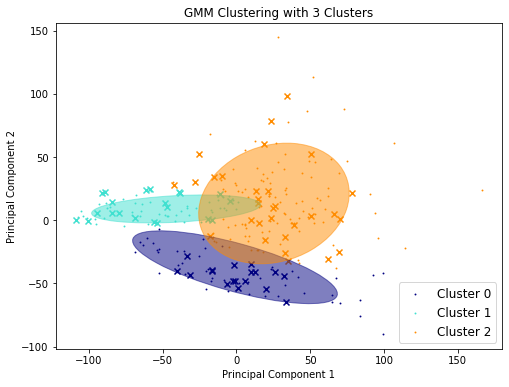

In [119]:
runGaussianMixture(X_train_10, X_test_10)

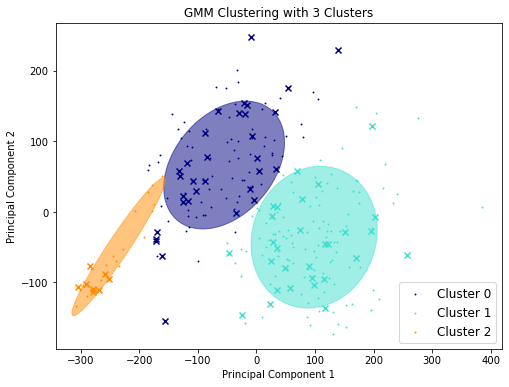

In [120]:
runGaussianMixture(X_train_100, X_test_100)

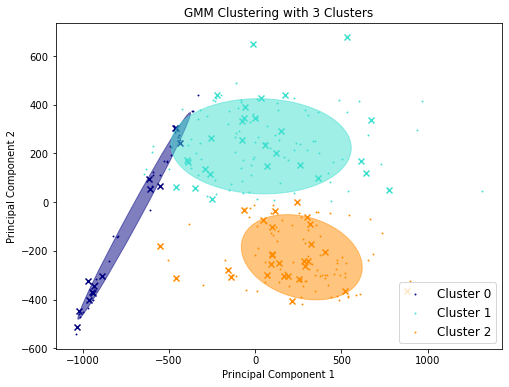

In [121]:
runGaussianMixture(X_train_1000, X_test_1000)

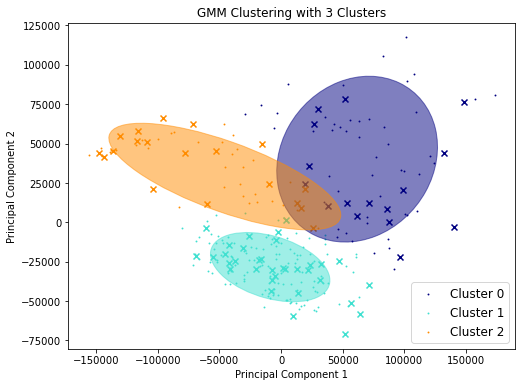

In [122]:
runGaussianMixture(X_train_10000, X_test_10000)

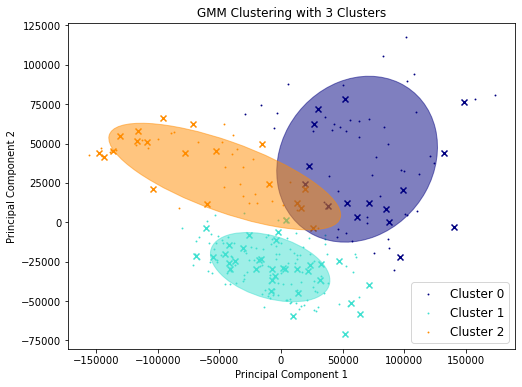

In [123]:
runGaussianMixture(X_train_5000, X_test_5000)

In [144]:
from scipy.stats import chi2_contingency

# Modified Chi-Squared test to directly compare cluster counts
def chi_squared_test_cluster_counts(cluster_labels_1, cluster_labels_2):
    # Count occurrences of each label in both datasets
    counts_1 = pd.Series(cluster_labels_1).value_counts().sort_index()
    counts_2 = pd.Series(cluster_labels_2).value_counts().sort_index()

    # Combine the counts into a table
    contingency_table = pd.DataFrame({'Dataset1': counts_1, 'Dataset2': counts_2})

    # Perform the Chi-Squared test on the counts
    chi2, p, dof, expected = chi2_contingency(contingency_table.T)

    return chi2, p

In [145]:
# Function to compare datasets by their cluster label counts
def compare_with_5000_by_counts(X_5000, X_other, other_name):
    # Train on 5000 genes
    X_train_5000, _ = splitTrainTest(X_5000)
    y_train_5000 = getClusterLabels(X_train_5000)

    # Train on the other dataset
    X_train_other, _ = splitTrainTest(X_other)
    y_train_other = getClusterLabels(X_train_other)

    # Perform Chi-Squared test directly on the cluster label counts
    chi2, p = chi_squared_test_cluster_counts(y_train_5000, y_train_other)

    # Print the Chi-Squared test results
    print(f'Chi-Squared test comparing 5000 genes with {other_name}:')
    print(f'Chi2 statistic: {chi2}, p-value: {p}')

In [146]:
def getClusterLabels(X_train_reduced, n_clusters=3):
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', max_iter=100, random_state=0)
    gmm.fit(X_train_reduced)
    return gmm.predict(X_train_reduced)

In [147]:
compare_with_5000_by_counts(X_5000, X_10, "10 genes")
compare_with_5000_by_counts(X_5000, X_100, "100 genes")
compare_with_5000_by_counts(X_5000, X_1000, "1000 genes")
compare_with_5000_by_counts(X_5000, X_10000, "10000 genes")

Chi-Squared test comparing 5000 genes with 10 genes:
Chi2 statistic: 62.2158152958153, p-value: 3.0903478395535355e-14
Chi-Squared test comparing 5000 genes with 100 genes:
Chi2 statistic: 9.971759211916691, p-value: 0.006833764363168428
Chi-Squared test comparing 5000 genes with 1000 genes:
Chi2 statistic: 29.614741524773734, p-value: 3.708861249142716e-07
Chi-Squared test comparing 5000 genes with 10000 genes:
Chi2 statistic: 0.0, p-value: 1.0


In [134]:
import os
notebook_path = os.path.abspath("Assignment3.ipynb")

notebook_path

'C:\\Users\\emily\\JuptyerLabProjects\\Bioinformatics\\Assignment3\\Assignment3.ipynb'